In [2]:
from rdkit import DistanceGeometry
import rdkit.Chem as Chem
from rdkit.Chem import Mol
from rdkit.Chem import rdDistGeom

In [3]:
base_folder = r'../data/raw/'

train_r_file = base_folder + 'train_reactants.sdf'
train_ts_file = base_folder + 'train_ts.sdf'
train_p_file = base_folder + 'train_products.sdf'

test_r_file = base_folder + 'test_reactants.sdf'
test_ts_file = base_folder + 'test_ts.sdf'
test_p_file = base_folder + 'test_products.sdf'

train_r = Chem.SDMolSupplier(train_r_file, removeHs=False, sanitize=False)
train_r = [x for x in train_r]
train_ts = Chem.SDMolSupplier(train_ts_file, removeHs=False, sanitize=False)
train_ts = [x for x in train_ts]
train_p = Chem.SDMolSupplier(train_p_file, removeHs=False, sanitize=False)
train_p = [x for x in train_p]

test_r = Chem.SDMolSupplier(test_r_file, removeHs=False, sanitize=False)
test_r = [x for x in test_r]
test_ts = Chem.SDMolSupplier(test_ts_file, removeHs=False, sanitize=False)
test_ts = [x for x in test_ts]
test_p = Chem.SDMolSupplier(test_p_file, removeHs=False, sanitize=False)
test_p = [x for x in test_p]

In [33]:
train_rxns = list(zip(train_r, train_ts, train_p))
test_rxns  = list(zip(test_r, test_ts, test_p))

In [12]:
from rdkit.Chem.rdmolops import GetAdjacencyMatrix

In [67]:
# bond changes per reaction based off adj matrix
# can normalise for number of atoms per reaction

import numpy as np
i = 5
max_bond_changes = 0
bond_changes = []
norm_bond_changes = []
for i, rxn in enumerate(train_rxns):
    # make all entries positive, just looking for bond changes
    new_bond_changes = np.sum( abs(GetAdjacencyMatrix(train_rxns[i][2]) - GetAdjacencyMatrix(train_rxns[i][0])) ) / 2
    changes = new_bond_changes
    bond_changes.append(changes)
    normalised_changes = new_bond_changes / train_rxns[i][2].GetNumAtoms()
    norm_bond_changes.append(normalised_changes)
    #if new_bond_changes > max_bond_changes:
    #    max_bond_changes = new_bond_changes

# max_bond_changes


(array([2.622e+03, 0.000e+00, 1.846e+03, 0.000e+00, 1.986e+03, 0.000e+00,
        2.650e+02, 0.000e+00, 1.800e+01, 2.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

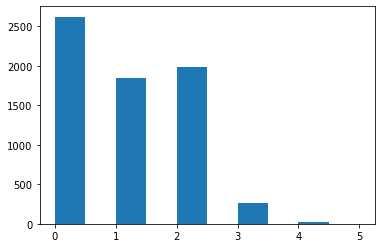

In [68]:
from matplotlib import pyplot as plt
plt.hist(bond_changes)

(array([2.623e+03, 1.590e+03, 1.251e+03, 8.300e+02, 3.080e+02, 1.080e+02,
        2.000e+01, 4.000e+00, 2.000e+00, 3.000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 <BarContainer object of 10 artists>)

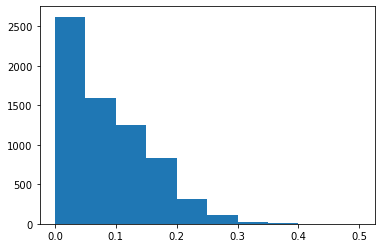

In [69]:
plt.hist(norm_bond_changes)

In [30]:
from rdkit.Chem import GetDistanceMatrix, Get3DDistanceMatrix

# find average topological dstance matrix
def get_avg_topological_dist(reactant, product):
    MAX_D = 10. # should bring this out later
    avg = (GetDistanceMatrix(reactant) + GetDistanceMatrix(product)) / 2
    avg[avg > MAX_D] = MAX_D
    return avg

def get_avg_topological_dist(reactant, product):
    avg = (Get3DDistanceMatrix(reactant) + Get3DDistanceMatrix(product)) / 2
    return avg

def ts_deviation_from_avg_topo(rxn):
    avg_topo = get_avg_topological_dist(rxn[0], rxn[2])
    ts_topo = GetDistanceMatrix(rxn[1])

def topological_distance_metric(t_mat_1, t_mat_2):
    return


In [22]:
avg_topo = get_avg_topological_dist(train_rxn[0][0], train_rxn[0][2])
ts_topo = GetDistanceMatrix(train_rxn[0][1])

### RDKit Functions
- GetNumAtoms() and GetNumHeavyAtoms(): size of mol approximated by #atoms in it
- 




In [57]:
# AddHs function adds H atoms to a MOL (as Hs in SMILES are usualy ignored)
# GetNumAtoms() method returns a general nubmer of all atoms in a molecule
# GetNumHeavyAtoms() method returns a nubmer of all atoms in a molecule with molecular weight > 1

from pandas import DataFrame

test = DataFrame(train_r)
test['num_atoms'] = [mol.GetNumAtoms() for mol in train_r]
test['num_heavy_atoms'] = [mol.GetNumHeavyAtoms() for mol in train_r]

# test['mol'] = [Chem.AddHs(mol) for mol in train_r]
# test['num_atoms'] = train_r.apply(lambda x: x.GetNumAtoms())
# test['num_heavy_atoms'] = train_r.apply(lambda x: x.GetNumHeavyAtoms())

In [58]:
test

,0,num_atoms,num_heavy_atoms
0,<rdkit.Chem.rdchem.Mol object at 0x000002421B2...,15,7
1,<rdkit.Chem.rdchem.Mol object at 0x000002421B2...,13,6
2,<rdkit.Chem.rdchem.Mol object at 0x000002421B2...,10,5
3,<rdkit.Chem.rdchem.Mol object at 0x000002421B2...,9,6
4,<rdkit.Chem.rdchem.Mol object at 0x000002421B2...,11,6
...,...,...,...
6734,<rdkit.Chem.rdchem.Mol object at 0x000002421C2...,14,7
6735,<rdkit.Chem.rdchem.Mol object at 0x000002421C2...,12,7
6736,<rdkit.Chem.rdchem.Mol object at 0x000002421C2...,10,7
6737,<rdkit.Chem.rdchem.Mol object at 0x000002421C2...,13,6


C:\Users\Avish\miniconda3\envs\3d-rdkit\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


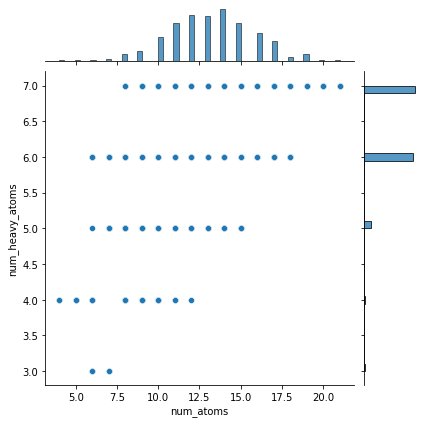

In [60]:
import seaborn as sns
sns.jointplot(test.num_atoms, test.num_heavy_atoms)
plt.show()

In [65]:
train_r[0].GetAtoms()

In [ ]:
# EDA

# GetBondLength(atom i, atom j)  in Å
# GetAngleDegree() and GetAngleRad() to get the bond angle between bonded atoms i, j and k
# GetDihedralDegree() and GetDihedralRad() to get the dihedral angle between bonded atoms i, j, k and l

# topological distances
MAX_D = 10
D


### Revisit later
- Some interesting functions that may be relevant later on in the project.

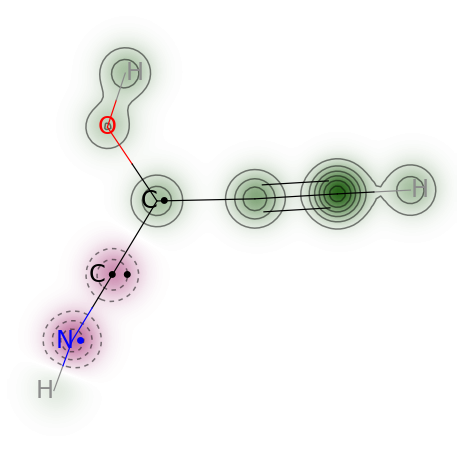

In [27]:
# this map compares fingerprints of molecules
# similarity maps visualise parts of a molecule that contribute to a similarity value or model prediction. helps us determine why molecules are considered similar.
# https://jcheminf.biomedcentral.com/articles/10.1186/1758-2946-5-43

# issues:
#   - requires sanitisation... probably okay for visualisation but does make changes that prevent this being useful later on. should double check if sanitisation is necessary.
#   - train_rxn[1] has none values, probably similar for others. this was brought on by performing sanitisation.
#   - order of mol and refmol is important

# goals later on:
#   - version for this that works with unsanitised molecules
#   - version that could work in 3d
#   - version that could work with learned ML features

from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps

mol = train_rxns[3][2]
refmol = train_rxns[3][0]
mol.UpdatePropertyCache()
refmol.UpdatePropertyCache()
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)

In [ ]:
# don't fully know what this does but could be useful

from rdkit.Chem import rdFMCS
res = rdFMCS.FindMCS([train_rxns[0][0], train_rxns[0][1], train_rxns[0][2]])
res.numBonds

In [ ]:
# visualises matrices: useful for distance matrices

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from rdkit.Chem import GetDistanceMatrix, Get3DDistanceMatrix

MAX = 25
l = Get3DDistanceMatrix(train_rxns[0][0])
a = l
a += a[::-1, :]

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(a, interpolation='bilinear', cmap=cm.seismic)
# ax1.imshow(a, interpolation='nearest', cmap=cm.Greys_r)